In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sqlalchemy import create_engine

In [3]:
housing=pd.read_csv('C:\\Users\\priya\\Downloads\\housing.csv')
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [118]:
! pip install mysql-connector-python 

# task 1:

In [13]:
housing1=housing[(housing['LotArea']>=6000)&(housing['LotConfig']=='Corner')]
housing1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1408,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1413,1414,20,RL,88.0,10994,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,COD,Abnorml,257000
1420,1421,60,RL,90.0,11700,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,179900
1428,1429,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Abnorml,119000


In [26]:
a=housing1['MSZoning'].value_counts()
a
b=housing1.groupby(by='MSZoning')['LotConfig'].count()
c=b.sort_values(ascending=False)
c
c.head(50)




MSZoning
RL         207
RM          27
FV           3
C (all)      2
RH           2
Name: LotConfig, dtype: int64

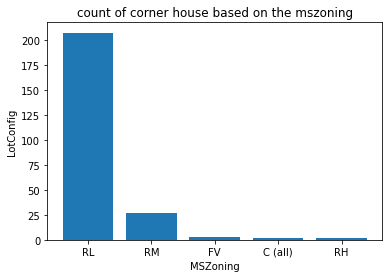

In [29]:
plt.bar(c.index,c.values)
plt.title("count of corner house based on the mszoning")
plt.xlabel("MSZoning")
plt.ylabel("LotConfig")
plt.show()

# task 2:

In [57]:
housing2=housing[(housing['BldgType']=='1Fam')&(housing['HouseStyle']=='1Story')&(housing['RoofStyle']=='Flat')]
housing2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
153,154,20,RL,NaN,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,235000
271,272,20,RL,73.0,39104,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,241500
457,458,20,RL,NaN,53227,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,256000
466,467,20,RL,85.0,10628,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,4,2007,WD,Normal,167000
588,589,20,RL,65.0,25095,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Partial,143000
888,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1000,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,82000


In [114]:
c=housing2['LandContour'].value_counts()
c



Lvl    4
Low    3
HLS    1
Name: LandContour, dtype: int64

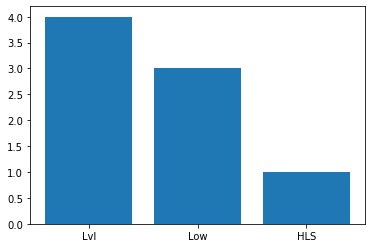

Text(0, 0.5, 'count')

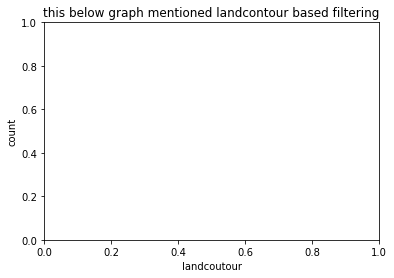

In [117]:
plt.bar(c.index,c.values)
plt.show()
plt.title("this below graph mentioned landcontour based filtering")
plt.xlabel("landcoutour")
plt.ylabel("count")

In [55]:
c=housing2['LotConfig'].value_counts()
c.head(10)

Inside     5
CulDSac    2
Corner     1
Name: LotConfig, dtype: int64

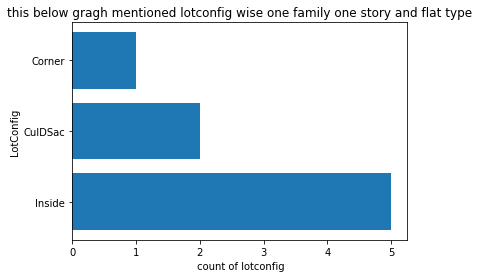

In [65]:
plt.barh(c.index,c.values)
plt.title("this below gragh mentioned lotconfig wise one family one story and flat type")
plt.xlabel(" count of lotconfig")
plt.ylabel("LotConfig")
plt.show()


# task 3:

In [74]:
housing3=housing[(housing['BldgType']=='1Fam')]
a=housing3.count()
b=a.head(10)
b

Id             1220
MSSubClass     1220
MSZoning       1220
LotFrontage     994
LotArea        1220
Street         1220
Alley            63
LotShape       1220
LandContour    1220
Utilities      1220
dtype: int64

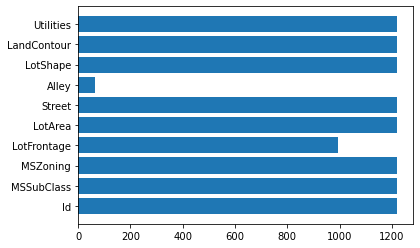

In [75]:
plt.barh(b.index,b.values)
plt.show()

# task 4:

In [107]:
housing4=housing[(housing['BedroomAbvGr']==3)&(housing['Exterior1st']=='CemntBd')&(housing['Exterior2nd']=='CmentBd')]
housing4

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
23,24,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,129900
108,109,50,RM,85.0,8500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,115000
196,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,311872
261,262,60,RL,69.0,9588,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,276000
278,279,20,RL,107.0,14450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,New,Partial,415298
304,305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,295000
305,306,20,RL,80.0,10386,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,305900
344,345,160,RM,36.0,2592,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,85000
357,358,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,134000
421,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [109]:
a=housing4['MSZoning'].value_counts()
a

RL    16
RM    13
FV     4
Name: MSZoning, dtype: int64

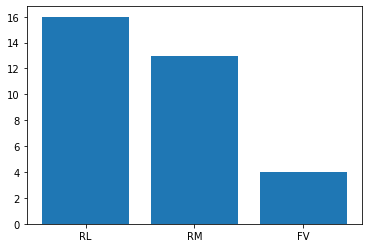

In [111]:
plt.bar(a.index,a.values)
plt.show()
plt.title("the below graph mentioned by ")

# task 5:

In [76]:
housing5=housing[(housing['GarageType']=='CarPort')&(housing['GarageCars']==2)&(housing['GarageArea']>=500)]
housing5

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
52,53,90,RM,110.0,8472,Grvl,NaN,IR2,Bnk,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,110000
666,667,60,RL,NaN,18450,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Abnorml,129000


In [88]:
a1=housing5.iloc[:]['GarageArea']
a1



17     CarPort
52     CarPort
666    CarPort
Name: GarageType, dtype: object

In [103]:
b1=housing5.iloc[:]['GarageCars']
b1


17     2
52     2
666    2
Name: GarageCars, dtype: int64

In [90]:
c1=housing5.iloc[:]['GarageType']
c1

17     CarPort
52     CarPort
666    CarPort
Name: GarageType, dtype: object

In [100]:

b=housing5.groupby(by='MSZoning')['LotConfig'].count()
c=b.sort_values(ascending=False)
c


MSZoning
RL    2
RM    1
Name: LotConfig, dtype: int64

In [101]:
a=housing5['MSZoning'].value_counts()
a

RL    2
RM    1
Name: MSZoning, dtype: int64

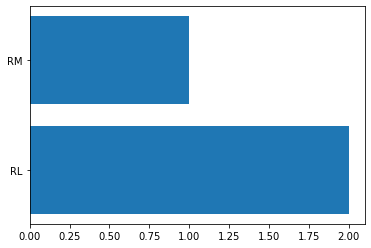

In [105]:
plt.barh(a.index,a.values)
plt.show()
plt.show